# RoadMap 10 - Torch NN Layers - Initializers
    
    1.   torch.nn.init.calculate_gain   - Return the recommended gain value for the given nonlinearity function.
    2.   torch.nn.init.uniform_         - Fills the input Tensor with values drawn from the 
                                           uniform distribution U(a,b).
    3.   torch.nn.init.normal_          - Fills the input Tensor with values drawn from the normal 
                                           distribution N(mean,std).
    4.   torch.nn.init.constant_        - Fills the input Tensor with the value val.
    5.   torch.nn.init.eye_             - Fills the 2-dimensional input Tensor with the identity matrix. 
    6.   torch.nn.init.dirac_           - Fills the {3, 4, 5}-dimensional input Tensor with the Dirac 
                                           delta function.
    7.   torch.nn.init.xavier_uniform_  - Fills the input Tensor with values according to the method described 
                                           in “Understanding the difficulty of training deep feedforward 
                                           neural networks” - Glorot, X. & Bengio, Y. (2010), using a 
                                           uniform distribution.
    8.   torch.nn.init.xavier_normal_   - Fills the input Tensor with values according to the method described 
                                           in “Understanding the difficulty of training deep feedforward 
                                           neural networks” - Glorot, X. & Bengio, Y. (2010), using a 
                                           normal distribution. 
    9.   torch.nn.init.kaiming_uniform_ - Fills the input Tensor with values according to the method described 
                                           in “Delving deep into rectifiers: Surpassing human-level performance 
                                           on ImageNet classification” - He, K. et al. (2015), using a 
                                           uniform distribution. 
    10.  torch.nn.init.kaiming_normal_  - Fills the input Tensor with values according to the method described
                                           in “Delving deep into rectifiers: Surpassing human-level performance 
                                           on ImageNet classification” - He, K. et al. (2015), using a 
                                           normal distribution.
    11.  torch.nn.init.orthogonal_      - Fills the input Tensor with a (semi) orthogonal matrix, as described 
                                           in “Exact solutions to the nonlinear dynamics of learning in deep
                                           linear neural networks” - Saxe, A. et al. (2013). 
    12.  torch.nn.init.sparse_          - Fills the 2D input Tensor as a sparse matrix, where the non-zero 
                                           elements will be drawn from the normal distribution N(0,0.01), 
                                           as described in “Deep learning via Hessian-free 
                                           optimization” - Martens, J. (2010).



In [1]:
import os
import sys
import torch
import numpy as np

In [2]:
import torch.nn as nn
from torchvision import transforms, datasets
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torchvision

## Extra Blog Resources

1. https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78
    
2. https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79
    
3. https://medium.com/usf-msds/deep-learning-best-practices-1-weight-initialization-14e5c0295b94

torch.Size([1, 3, 576, 768])


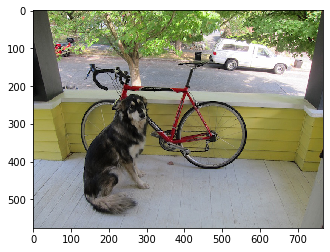

In [3]:
# Input
image_name = "dog.jpg"
image_pil = Image.open(image_name)

transform = transforms.Compose([transforms.ToTensor()])
image = transform(image_pil).float()
image_nchw = torch.unsqueeze(image, 0)
print(image_nchw.size())
plt.imshow(image_pil)

In [4]:
# Gain from non-linearity

'''
1. nn.init.calculate_gain - Return the recommended gain value for the given nonlinearity function.
        - nonlinearity – the non-linear function (nn.functional name)
        - param – optional parameter for the non-linear function
'''

gain_leaky_relu = nn.init.calculate_gain('leaky_relu')
gain_conv2d = nn.init.calculate_gain('conv2d')

print("Gain of Leaky ReLU - ", gain_leaky_relu)
print("Gain of Convolution 2d - ", gain_conv2d)

Gain of Leaky ReLU -  1.4141428569978354
Gain of Convolution 2d -  1


In [5]:
# Uniform Filler function

'''
2. nn.init.uniform_ - Fills the input Tensor with values drawn from the uniform distribution U(a,b).
        - tensor – an n-dimensional torch.Tensor
        - a – the lower bound of the uniform distribution
        - b – the upper bound of the uniform distribution
'''

w = torch.empty(3, 5)
w = nn.init.uniform_(w, a=2, b=5)

print("w = ", w)

w =  tensor([[3.0562, 3.5331, 4.9088, 4.0742, 4.9988],
        [2.9390, 3.1692, 4.4614, 2.9387, 4.1282],
        [3.7642, 3.1097, 2.6913, 4.2157, 2.6680]])


In [6]:
# Normal filler function

'''
3. nn.init.normal_ - Fills the input Tensor with values drawn from the normal distribution N(mean,std).
        - tensor – an n-dimensional torch.Tensor
        - mean – the mean of the normal distribution
        - std – the standard deviation of the normal distribution
'''

w = torch.empty(3, 5)
w = nn.init.uniform_(w, 0.0, 1.0)

print("w = ", w)

w =  tensor([[0.9054, 0.9552, 0.5695, 0.7721, 0.2062],
        [0.5481, 0.0176, 0.3032, 0.1626, 0.7492],
        [0.7191, 0.6389, 0.7742, 0.1305, 0.1431]])


In [7]:
# Constant filler function

'''
4. nn.init.constant_ - Fills the input Tensor with the value val.
        - tensor – an n-dimensional torch.Tensor
        - val – the value to fill the tensor with
'''
w = torch.empty(3, 5)
w = nn.init.constant_(w, 1.5)

print("w = ", w)

w =  tensor([[1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000]])


In [8]:
# Eye filler function

'''
5. nn.init.eye_ - Fills the 2-dimensional input Tensor with the identity matrix. 
    Preserves the identity of the inputs in Linear layers, where as many inputs are preserved as possible.
'''

w = torch.empty(3, 5)
w = nn.init.eye_(w)

print("w = ", w)

w =  tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.]])


In [9]:
# Dirac delta filler function

'''
6. nn.init.dirac_ - Fills the {3, 4, 5}-dimensional input Tensor with the Dirac delta function.
'''

w = torch.empty(1, 3, 5)
w = nn.init.dirac_(w)

print("w = ", w)

w =  tensor([[[0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])


In [10]:
# Xavier uniform filler function

'''
7. nn.init.xavier_uniform_ - Fills the input Tensor with values according to the method described in “Understanding the 
    difficulty of training deep feedforward neural networks” - Glorot, X. & Bengio, Y. (2010), using a uniform distribution.
'''

w = torch.empty(3, 5)
w = nn.init.xavier_uniform_(w, gain=nn.init.calculate_gain('relu'))

print("w = ", w)

w =  tensor([[-1.1073e+00, -4.7648e-01,  4.9130e-01, -7.3210e-01, -3.9223e-01],
        [-3.8663e-01,  1.0986e-03,  6.3327e-01,  1.0601e+00,  5.4131e-01],
        [ 7.1573e-01,  5.8910e-01,  5.1314e-01, -9.1695e-01, -1.0746e+00]])


In [11]:
# Xavier normal filler function

'''
8. nn.init.xavier_normal_ - Fills the input Tensor with values according to the method described in “Understanding the 
    difficulty of training deep feedforward neural networks” - Glorot, X. & Bengio, Y. (2010), using a normal distribution. 
'''

w = torch.empty(3, 5)
w = nn.init.xavier_normal_(w, gain=nn.init.calculate_gain('leaky_relu'))

print("w = ", w)

w =  tensor([[-0.3736,  0.6900, -0.1194,  0.8836,  0.5948],
        [ 0.0127,  1.1169, -0.2909, -0.0957,  0.3983],
        [-0.4275, -0.7393, -0.2775, -0.4135,  0.2236]])


In [12]:
# Kaming uniform filler function

'''
9. nn.init.kaiming_uniform_ - Fills the input Tensor with values according to the method described in “Delving deep 
    into rectifiers: Surpassing human-level performance on ImageNet classification” - He, K. et al. (2015), 
    using a uniform distribution. 
            - tensor – an n-dimensional torch.Tensor
            - a – the negative slope of the rectifier used after this layer (0 for ReLU by default)
            - mode – either ‘fan_in’ (default) or ‘fan_out’. Choosing fan_in preserves the magnitude of the variance 
                 of the weights in the forward pass. Choosing fan_out preserves the magnitudes in the backwards pass.
            - nonlinearity – the non-linear function (nn.functional name), recommended to use only with 
                ‘relu’ or ‘leaky_relu’ (default).

'''

w = torch.empty(3, 5)
w = nn.init.kaiming_uniform_(w, mode='fan_in', nonlinearity='relu')

print("w = ", w)

w =  tensor([[ 0.9882,  0.5988,  0.8306, -0.9660,  0.8371],
        [-0.8384,  0.8993, -0.6808, -0.9475, -0.7611],
        [ 0.7719,  0.0745,  0.5887, -0.1058,  0.3710]])


In [13]:
# Kaming normal filler function

'''
10. nn.init.kaiming_normal_ - Fills the input Tensor with values according to the method described in “Delving deep 
        into rectifiers: Surpassing human-level performance on ImageNet classification” - 
        He, K. et al. (2015), using a normal distribution. 
            - tensor – an n-dimensional torch.Tensor
            - a – the negative slope of the rectifier used after this layer (0 for ReLU by default)
            - mode – either ‘fan_in’ (default) or ‘fan_out’. Choosing fan_in preserves the magnitude of the variance 
                 of the weights in the forward pass. Choosing fan_out preserves the magnitudes in the backwards pass.
            - nonlinearity – the non-linear function (nn.functional name), recommended to use only with 
                ‘relu’ or ‘leaky_relu’ (default).

'''

w = torch.empty(3, 5)
w = nn.init.kaiming_normal_(w, mode='fan_in', nonlinearity='relu')

print("w = ", w)

w =  tensor([[-1.0379,  0.5932,  0.6507, -0.6701,  1.0487],
        [ 0.9954,  0.6190,  0.4138, -0.3912,  0.7090],
        [-0.0639,  0.7774,  0.1236, -0.1281,  0.7699]])


In [14]:
# Orthogonal filler function

'''
11. torch.nn.init.orthogonal_ - Fills the input Tensor with a (semi) orthogonal matrix, as described in 
        “Exact solutions to the nonlinear dynamics of learning in deep linear neural networks” - Saxe, A. et al. (2013). 
            - tensor – an n-dimensional torch.Tensor, where n≥2
            - gain – optional scaling factor
'''

w = torch.empty(3, 5)
w = nn.init.orthogonal_(w)

print("w = ", w)


w =  tensor([[ 0.1697,  0.7113, -0.4250,  0.5203, -0.1180],
        [-0.1037, -0.2376, -0.7424, -0.3614, -0.5010],
        [-0.3812,  0.6455,  0.2420, -0.5959, -0.1561]])


In [15]:
# Sparse filler function

'''
12. nn.init.sparse_ - Fills the 2D input Tensor as a sparse matrix, where the non-zero elements will be drawn 
    from the normal distribution N(0,0.01), as described in “Deep learning via Hessian-free optimization” 
    - Martens, J. (2010).
        - tensor – an n-dimensional torch.Tensor
        - sparsity – The fraction of elements in each column to be set to zero
        - std – the standard deviation of the normal distribution used to generate the non-zero values

'''

w = torch.empty(3, 5)
w = nn.init.sparse_(w, sparsity=0.2)

print("w = ", w)

w =  tensor([[-0.0088, -0.0039,  0.0000,  0.0053, -0.0024],
        [-0.0053,  0.0000,  0.0062,  0.0000, -0.0075],
        [ 0.0000, -0.0011, -0.0023,  0.0045,  0.0000]])


## Author - Tessellate Imaging - https://www.tessellateimaging.com/

## Monk Library - https://github.com/Tessellate-Imaging/monk_v1

    Monk is an opensource low-code tool for computer vision and deep learning

### Monk features
- low-code
- unified wrapper over major deep learning framework - keras, pytorch, gluoncv
- syntax invariant wrapper


### Enables
- to create, manage and version control deep learning experiments
- to compare experiments across training metrics
- to quickly find best hyper-parameters


### At present it only supports transfer learning, but we are working each day to incorporate
- GUI based custom model creation
- various object detection and segmentation algorithms
- deployment pipelines to cloud and local platforms
- acceleration libraries such as TensorRT
- preprocessing and post processing libraries

## To contribute to Monk AI or Pytorch RoadMap repository raise an issue in the git-repo or dm us on linkedin 
 - Abhishek - https://www.linkedin.com/in/abhishek-kumar-annamraju/
 - Akash - https://www.linkedin.com/in/akashdeepsingh01/